In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
length = 100
def cal_intersection(result_y, complete_y):
    for i in range(length):
        for j in range(5):
            if result_y[i+j] > complete_y[i+j]:
                break
        if j == 4:
#             print('交叉点: {}'.format(i))
            return i

def cal_intersections(results_y, completes_y):
    intersections = np.zeros(results_y.shape[0])
    for i in range(results_y.shape[0]):
        intersections[i] = cal_intersection(results_y[i], completes_y[i])
    return intersections

def show(complete_y, result_y, cell_line):
    sns.set_style("whitegrid") 
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharey=True)
    axes.grid(False)
    axes.plot(list(range(complete_y.shape[0])), complete_y, color=(166/255, 206/255, 227/255), label='complete')
    axes.plot(list(range(complete_y.shape[0])), result_y, color=(51/255, 160/255, 44/255), label='mine')

#     plt.ylim(0, 1)
    plt.xlabel('Genomic distance(1kb)')
    plt.ylabel('Pearson')
    plt.xlim(0, length)
    plt.legend()
    plt.title(cell_line)
#     plt.savefig('{}.pdf'.format(cell_line))
    plt.show()
    print('交叉点: {}'.format(cal_intersection(result_y, complete_y)))

#     print("complete_y: {}".format(np.mean(complete_y)))
#     print("enhanced: {}".format(np.mean(result_y)))

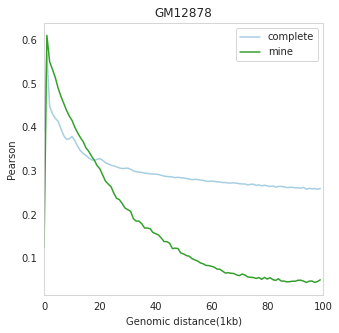

交叉点: 19


In [3]:
complete_y = np.load('temp/GM12878_complete_y.npy')[:22]
result_y = np.load('temp/GM12878_result_y.npy')[:22]

show(np.average(complete_y, axis=0), np.average(result_y, axis=0), 'GM12878')
GM12878 = cal_intersections(result_y, complete_y)

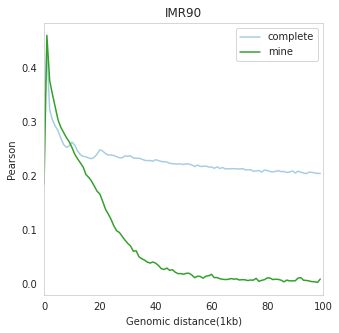

交叉点: 10


In [4]:
complete_y = np.load('temp/IMR90_complete_y.npy')[:22]
result_y = np.load('temp/IMR90_result_y.npy')[:22]

show(np.average(complete_y, axis=0), np.average(result_y, axis=0), 'IMR90')
IMR90 = cal_intersections(result_y, complete_y)

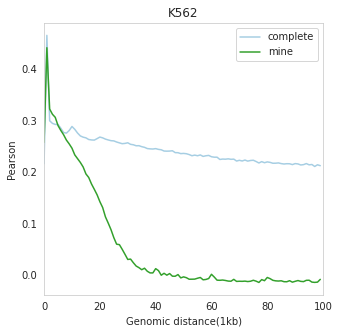

交叉点: 5


In [5]:
complete_y = np.load('temp/K562_complete_y.npy')[:22]
result_y = np.load('temp/K562_result_y.npy')[:22]

show(np.average(complete_y, axis=0), np.average(result_y, axis=0), 'K562')
K562 = cal_intersections(result_y, complete_y)

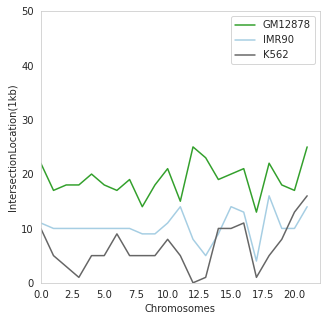

In [6]:
x = list(range(len(GM12878)))

sns.set_style("whitegrid") 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharey=True)
axes.grid(False)

axes.plot(x, GM12878, color=(51/255, 160/255, 44/255), label='GM12878')
axes.plot(x, IMR90, color=(166/255, 206/255, 227/255), label='IMR90')
axes.plot(x, K562, color=(102/255, 102/255, 102/255), label='K562')

plt.ylim(0, 50)
plt.xlabel('Chromosomes')
plt.ylabel('IntersectionLocation(1kb)')
plt.xlim(0, len(x))
plt.legend()
plt.savefig('IntersectionLocation_1.pdf')
plt.show()

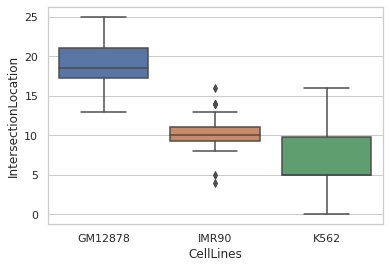

In [7]:
GM12878_new = [['GM12878', GM12878[i]] for i in range(len(GM12878))]
IMR90_new = [['IMR90', IMR90[i]] for i in range(len(IMR90))]
K562_new = [['K562', K562[i]] for i in range(len(K562))]

GM12878_df = pd.DataFrame(GM12878_new, columns=['CellLines', 'IntersectionLocation'])
IMR90_df = pd.DataFrame(IMR90_new, columns=['CellLines', 'IntersectionLocation'])
K562_df = pd.DataFrame(K562_new, columns=['CellLines', 'IntersectionLocation'])
df = pd.concat([GM12878_df, IMR90_df, K562_df])

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="CellLines", y="IntersectionLocation", data=df)
fig = ax.get_figure()
fig.savefig('IntersectionLocation_2.pdf')

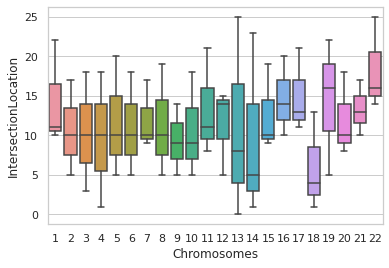

In [8]:
_list = []
for i in range(22):
    _list.append([i+1, GM12878[i]])
    _list.append([i+1, IMR90[i]])
    _list.append([i+1, K562[i]])
df = pd.DataFrame(_list, columns=['Chromosomes', 'IntersectionLocation'])

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Chromosomes", y="IntersectionLocation", data=df)
fig = ax.get_figure()
fig.savefig('IntersectionLocation_3.pdf')